In [25]:
import pandas as pd

In [26]:
import numpy as np

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
data = pd.read_csv('C:/Users/user/Downloads/data.csv')


In [30]:
data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,NaN,0.65,9.8,5.0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# Cleaning Data

### searching for null values in csv

In [7]:
data.isnull()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,False,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False,False
1598,False,False,False,False,False,False,False,False,False,False,False,False,False
1599,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

ID                      0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

### Replacing null values in each column.

In [9]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']

In [10]:
for col in columns:
    data[col].fillna(data[col].mean(), inplace=True)

The reason for replacing null values with the mean of eachis to preserve the sample size and provide an approximate estimate of the missing data. The data though is assumed to be normally distributed.

In [11]:
data.isnull().sum()

ID                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking for duplicates 

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1596    False
1597    False
1598    False
1599    False
1600    False
Length: 1601, dtype: bool

In [13]:
data.duplicated().sum()

0

There are no duplicates for the data

# Statistical inferences of all data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1601 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1601 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1601 non-null   float64
 6   free sulfur dioxide   1601 non-null   float64
 7   total sulfur dioxide  1601 non-null   float64
 8   density               1601 non-null   float64
 9   pH                    1601 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1601 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


In [15]:
data.describe() #Checking for statistics

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.739495,0.178981,0.194684,1.409138,0.047032,10.455218,32.967416,0.001887,0.154290,0.169471,1.065495,0.807116
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Histograms of each column indicating the distribution of each column in the dataset

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

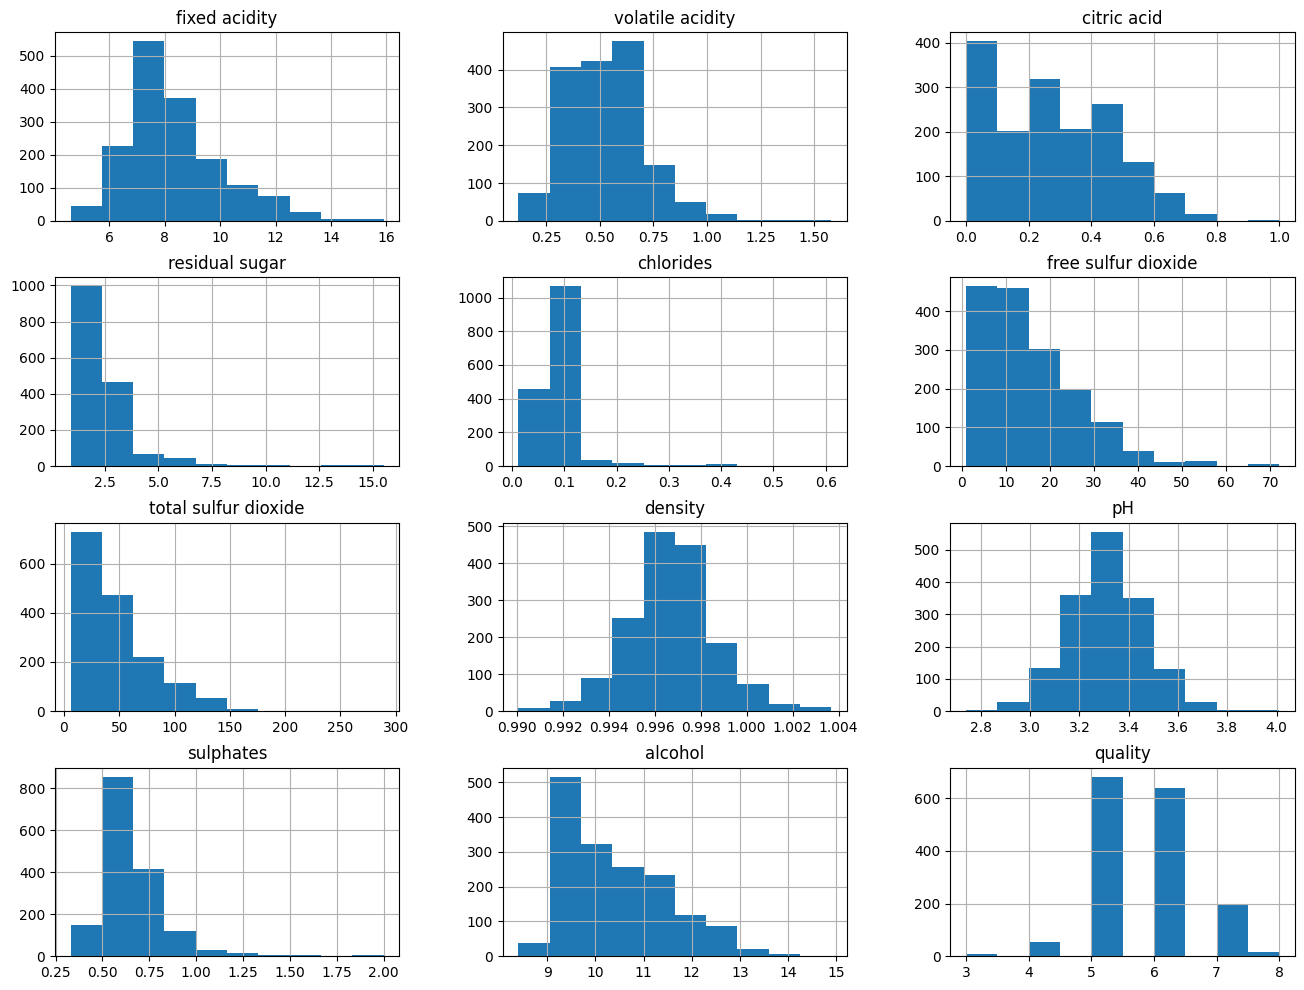

In [16]:
data_without_ID_col = data.drop('ID', axis = 1)
data_without_ID_col.hist(figsize=(16, 12))

In [31]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']

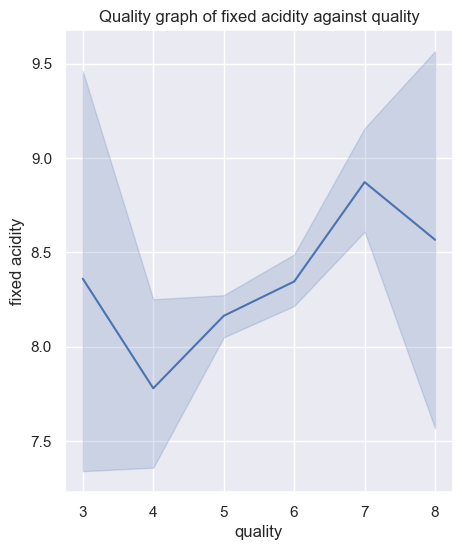

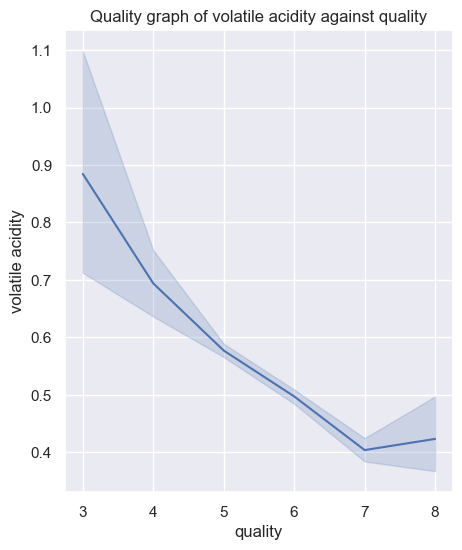

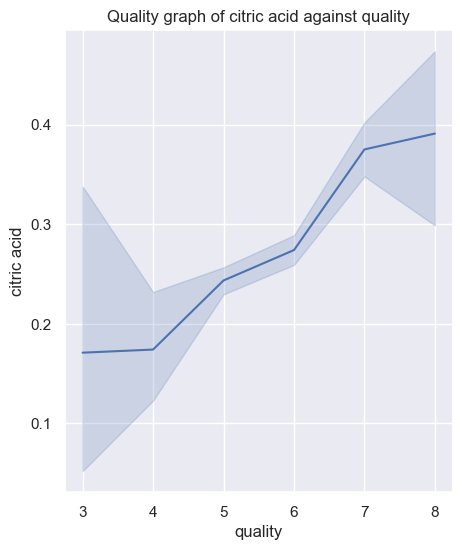

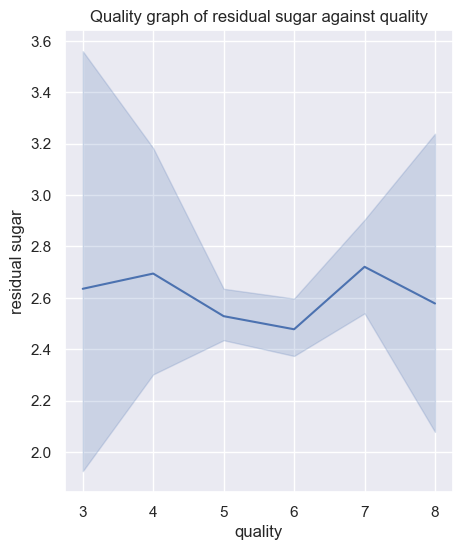

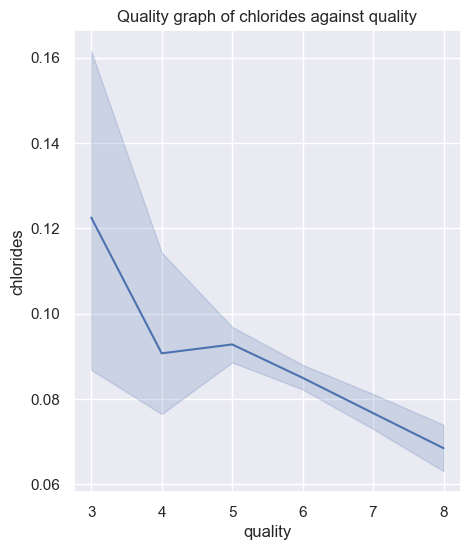

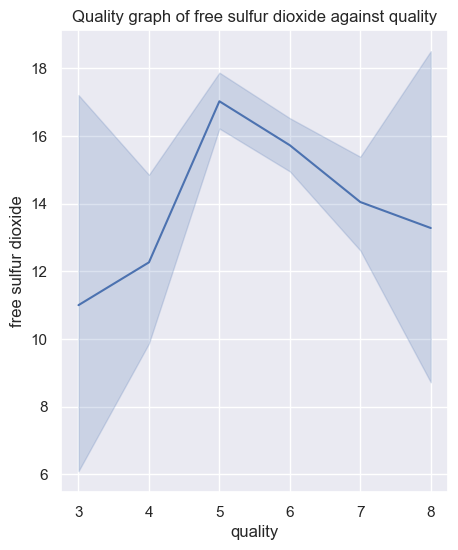

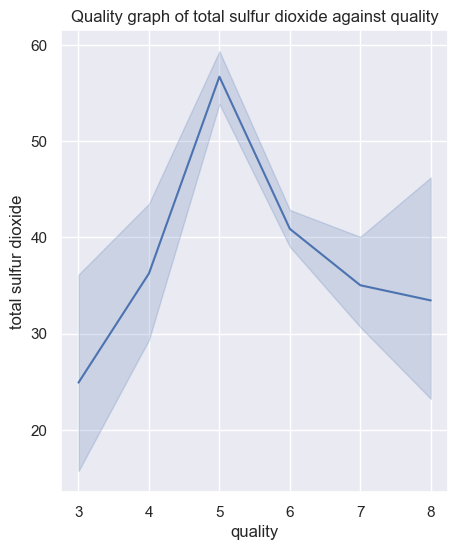

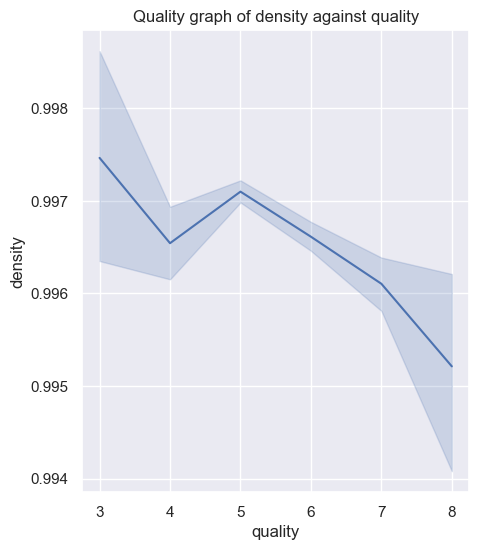

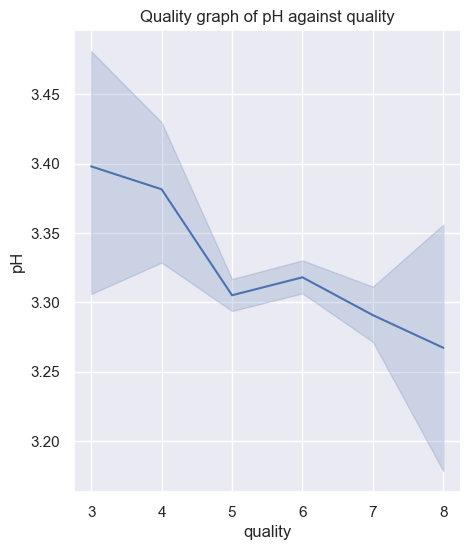

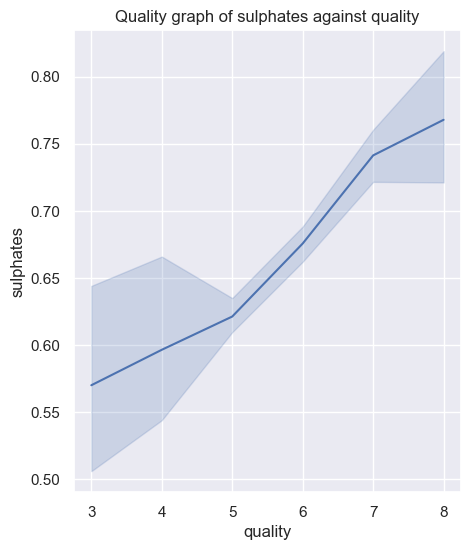

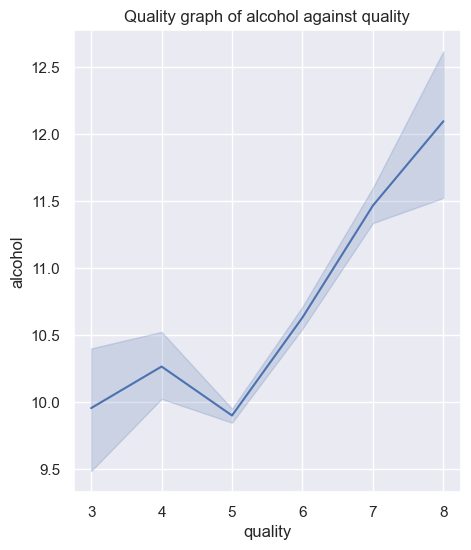

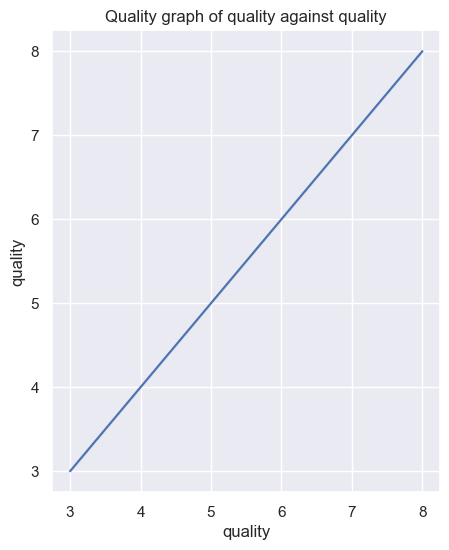

In [37]:
for column in columns:
    plt.figure(figsize=(5,6))
    plt.title(f"Quality graph of {column} against quality")
    sns.lineplot(x=data['quality'],y=column,data=data)
    
    plt.show()
    

## Correllation between pH and acidity

In [17]:
acidity = ['fixed acidity', 'volatile acidity', 'citric acid']

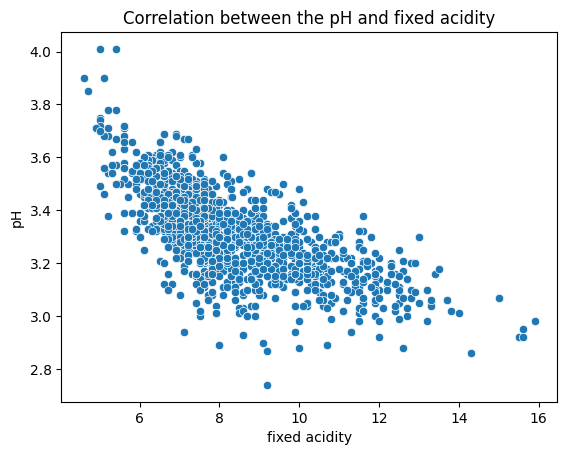

<Figure size 1200x1000 with 0 Axes>

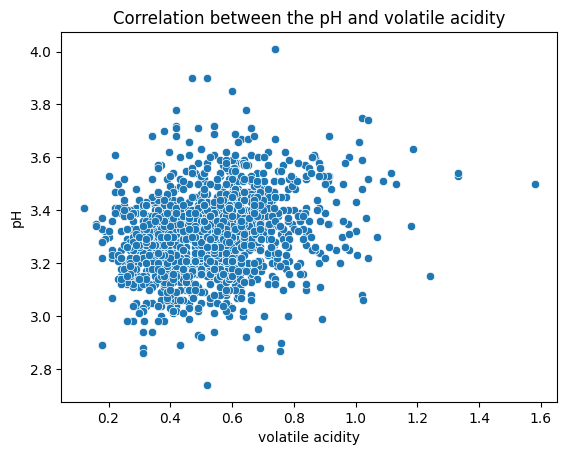

<Figure size 1200x1000 with 0 Axes>

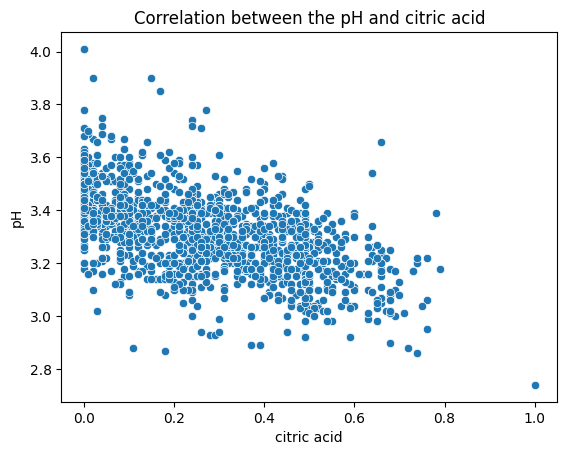

<Figure size 1200x1000 with 0 Axes>

In [18]:
for acid in acidity:
    plt.title(f'Correlation between the pH and {acid}')
    sns.scatterplot(x=acid ,y='pH' ,data=data)
    plt.figure(figsize=(12,10))
    plt.show()

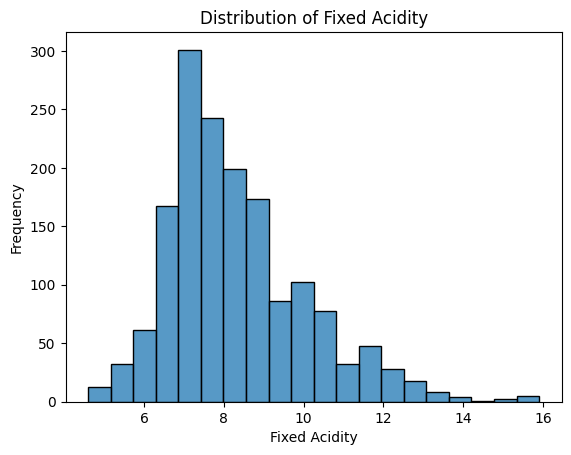

In [19]:
sns.histplot(data['fixed acidity'], bins=20)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Fixed Acidity')
plt.show()

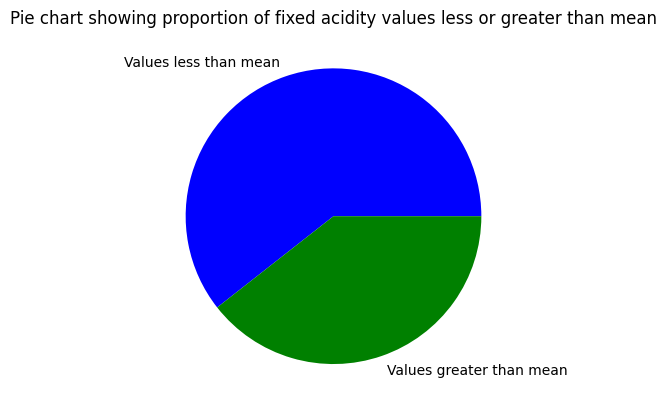

<Figure size 640x480 with 0 Axes>

In [20]:
fixed_acidity_mean = data['fixed acidity'].mean()

comparison_mean = data['fixed acidity'] < fixed_acidity_mean

plt.pie(comparison_mean.value_counts(),labels =['Values less than mean', 'Values greater than mean'], colors = ['Blue','Green'] )
plt.title('Pie chart showing proportion of fixed acidity values less or greater than mean')
plt.show()
plt.savefig('image_1.png')

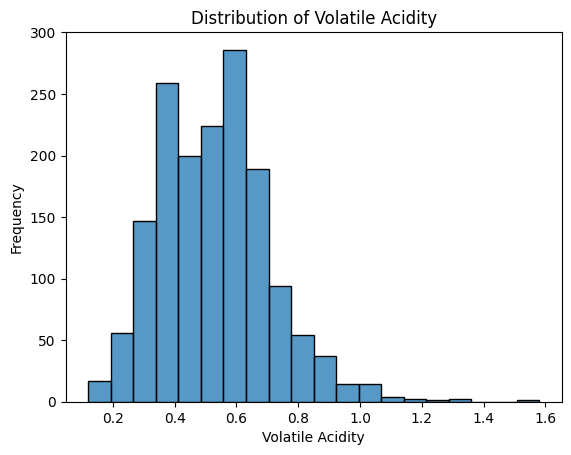

In [21]:
sns.histplot(data['volatile acidity'], bins=20)
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Volatile Acidity')
plt.show()

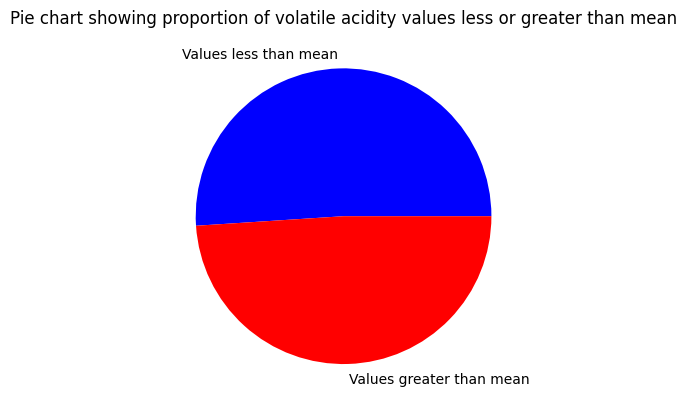

<Figure size 640x480 with 0 Axes>

In [22]:
volatile_acidity_mean = data['volatile acidity'].mean()

comparison_mean = data['volatile acidity'] < volatile_acidity_mean

plt.pie(comparison_mean.value_counts(),labels = ['Values less than mean', 'Values greater than mean'], colors = ['blue','red'] )
plt.title('Pie chart showing proportion of volatile acidity values less or greater than mean')
plt.show()
plt.savefig('image_2.png')

## Displaying hidden inferences using a pairplot


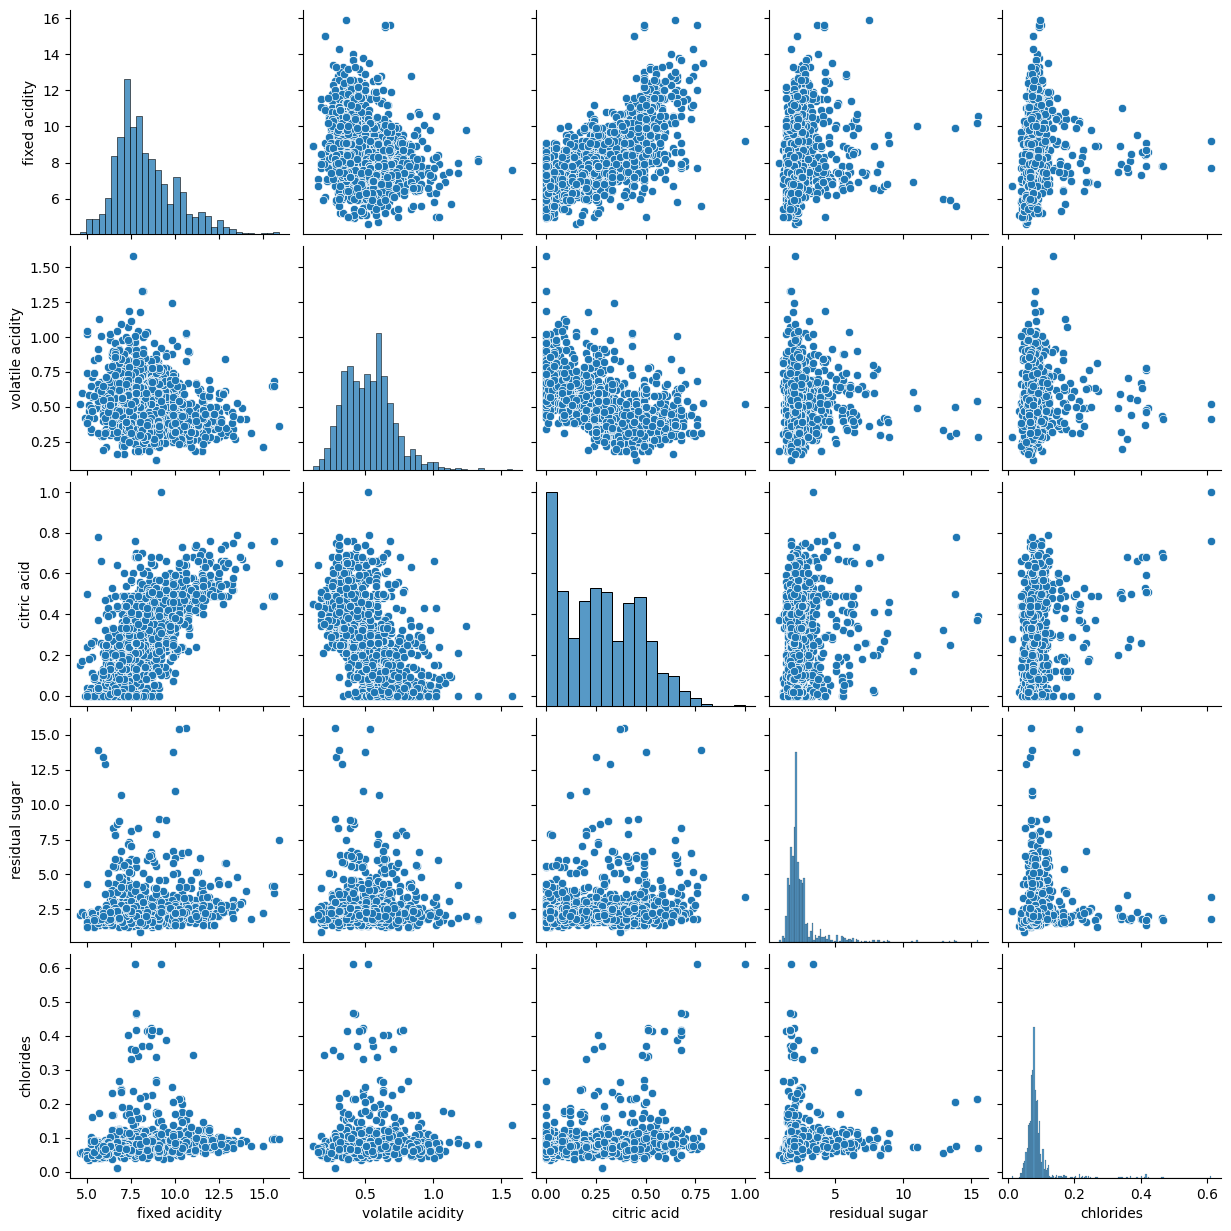

In [23]:
sns.pairplot(data, vars=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides'])

## Correlation of data using heatmap

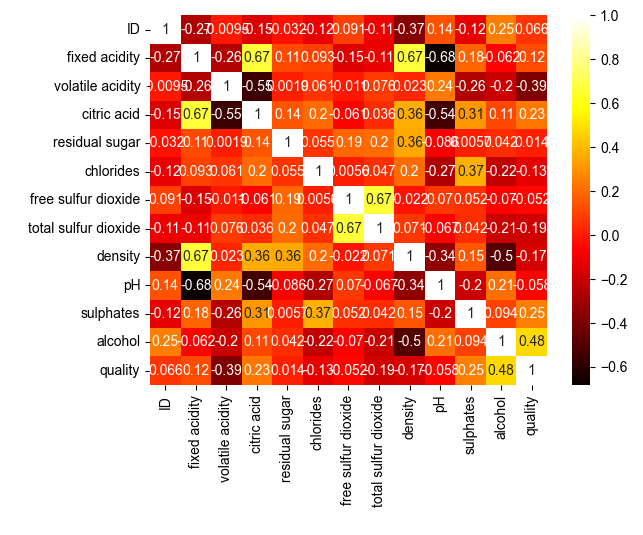

In [24]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'hot')
sns.set(rc={'figure.figsize':(15,12)})